# (2) Salary_hike

In [1]:
# Importing liberies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Read data

df = pd.read_csv(r"D:\Assignment\Simple Linear Regression\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA and Data Visualization

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

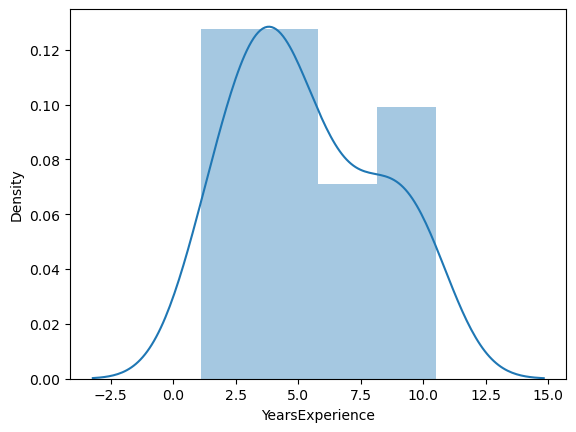

In [5]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

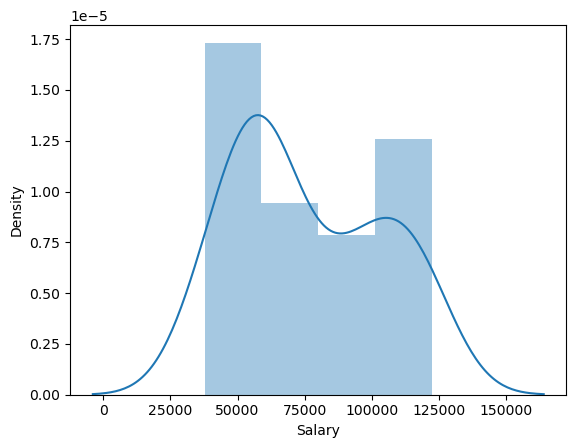

In [6]:
sns.distplot(df['Salary'])

## Correlation Analysis

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

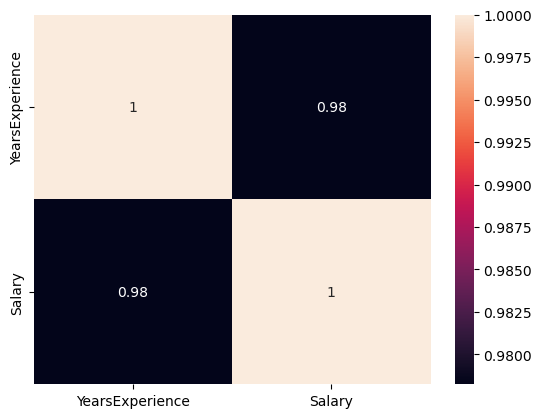

In [8]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

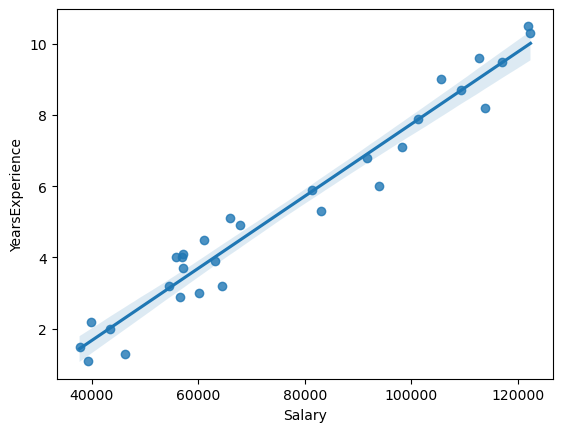

In [9]:
sns.regplot(df['Salary'], df['YearsExperience'])

## Model Building

In [10]:
model = smf.ols('Salary ~ YearsExperience', data=df).fit()

### Model Testing

In [11]:
# Finding Coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
# Finding tvalues and pvalues
print(model.tvalues,model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [13]:
# Finding Rsquared Values
print(model.rsquared, model.rsquared_adj)

0.9569566641435086 0.9554194021486339


## Model Predictions

In [1]:
# Manual prediction 
# y = m(x) + c

delivery_time = (9449.962321 * 5)+ 25792.200199
delivery_time

73042.01180400001

In [15]:
# Automatic Prediction

new_data = pd.Series([2,6,4,8,9])
new_data = pd.DataFrame(new_data,columns=['YearsExperience'])
new_data

,YearsExperience
0,2
1,6
2,4
3,8
4,9


In [16]:
model.predict(new_data)

0     44692.124842
1     82491.974127
2     63592.049484
3    101391.898770
4    110841.861092
dtype: float64